In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/pairs_dists.csv")
df.shape

(578907, 28)

In [3]:
df_US = df.loc[(df['country_1']=='US') & (df['country_2']=='US'),['name_similarity','match']]

In [4]:
df_US.shape

(117708, 2)

In [ ]:
df_US.head()

In [5]:
X = df_US.iloc[:,0].values
y = df_US.iloc[:,1].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2,
                                                       stratify=y)

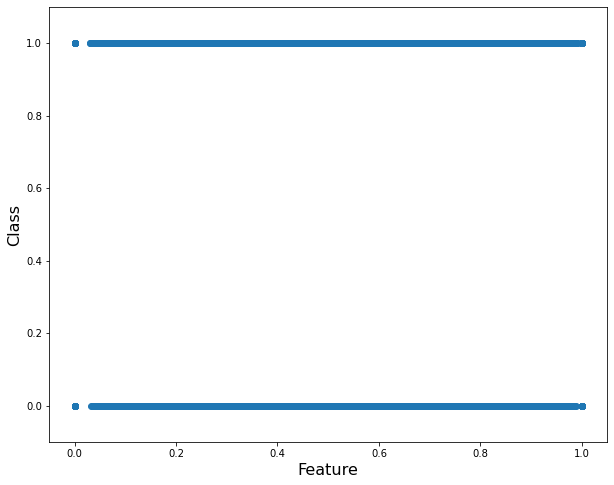

In [8]:
plt.figure(figsize = (10,8))

plt.scatter(X_train,y_train)
plt.ylim((-.1,1.1))
plt.xlabel("Feature",fontsize = 16)
plt.ylabel("Class",fontsize = 16)

plt.show()

In [14]:
# x = 10

# plt.figure(figsize = (10,8))

# plt.plot(np.arange(-x,x,.01),1/(1+np.exp(-np.arange(-x,x,.01))))


# plt.xlabel("x",fontsize = 16)
# plt.ylabel("f(x)",fontsize = 16)

# plt.title("A Sigmoidal Curve", fontsize=18)

# plt.show()

In [9]:
## import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [10]:
## make model object
log_reg = LogisticRegression()

## fit the model
log_reg.fit(X_train.reshape(-1,1), y_train)

LogisticRegression()

In [11]:
## Demonstrate predict
log_reg.predict(X_train.reshape(-1,1))

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
## Demonstrate predict_proba
log_reg.predict_proba(X_train.reshape(-1,1))

array([[0.15395809, 0.84604191],
       [0.20140995, 0.79859005],
       [0.23868244, 0.76131756],
       ...,
       [0.38226351, 0.61773649],
       [0.23868244, 0.76131756],
       [0.28393621, 0.71606379]])

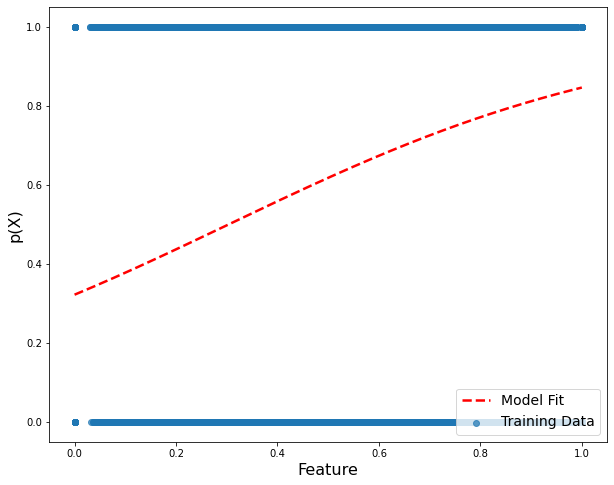

In [15]:
# Plot figure 
plt.figure(figsize = (10,8))

# With classifications we have a new method
# predict_proba which returns the probability
# that an observation is a certain class.
plt.plot(np.linspace(0,1,1000),
            log_reg.predict_proba(np.linspace(0,1,1000).reshape(-1,1))[:,1],
            'r--',linewidth=2.5,label = "Model Fit")
plt.scatter(X_train,y_train,label = 'Training Data',alpha=.7)
plt.legend(fontsize = 14,loc = 4)
plt.xlabel("Feature",fontsize = 16)
plt.ylabel("p(X)",fontsize=16) 

plt.show()

In [16]:
## set the cutoff
cutoff = 0.8

## store the predicted probabilities
y_prob = log_reg.predict_proba(X_train.reshape(-1,1))[:,1]

## assign the value based on the cutoff
1*(y_prob >= cutoff)


array([1, 0, 0, ..., 0, 0, 0])

In [17]:
## set the cutoff
cutoff = 0.8

## store the predicted probabilities
y_prob = log_reg.predict_proba(X_train.reshape(-1,1))[:,1]

## assign the value based on the cutoff
y_train_pred = 1*(y_prob >= cutoff)

## print the accuracy
## input the accuracy after "is",
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_train_pred == y_train)/len(y_train))

The training accuracy for a cutoff of 0.8 is 0.5850519295711828


In [18]:
## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob >= cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

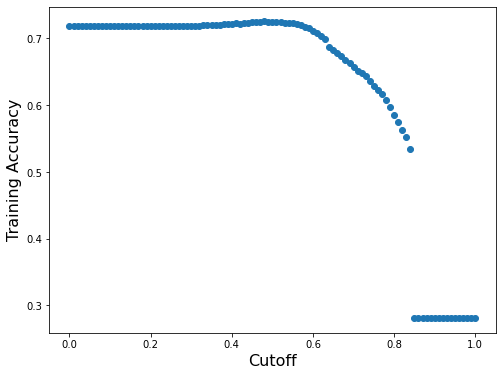

In [20]:
plt.figure(figsize=(8,6))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

In [21]:
## demonstrate log_reg.coef_
log_reg.coef_[0][0]

2.4478732597811583

In [22]:
print("A .1 unit increase in our feature multiplies" + 
      " the odds of being classified as 1 by " + 
      str(np.round(np.exp(.1*log_reg.coef_[0][0]),2)))

A .1 unit increase in our feature multiplies the odds of being classified as 1 by 1.28


## Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [26]:
print("Confusion Matrix for a cutoff of 0.5")
print(confusion_matrix(y_train, 
                       np.int64(log_reg.predict_proba(X_train.reshape(-1,1))[:,1] >= 0.5)))

print()
print()

print("Confusion Matrix for a cutoff of 0.8")
print(confusion_matrix(y_train, 
                       np.int64(log_reg.predict_proba(X_train.reshape(-1,1))[:,1] >= 0.8)))


Confusion Matrix for a cutoff of 0.5
[[ 5144 21333]
 [ 4549 63140]]


Confusion Matrix for a cutoff of 0.8
[[21333  5144]
 [33930 33759]]


# Precision-recall

In [27]:
from sklearn.metrics import recall_score, precision_score

In [28]:
cutoffs = np.arange(0.001,.975,.001)

prec_scores = []
rec_scores = []

for cutoff in cutoffs:
    pred = 1*(log_reg.predict_proba(X_train.reshape(-1,1))[:,1] >= cutoff)
    
    prec_scores.append(precision_score(y_train, pred))
    rec_scores.append(recall_score(y_train, pred))

/Users/cao20/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cao20/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cao20/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cao20/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classifica

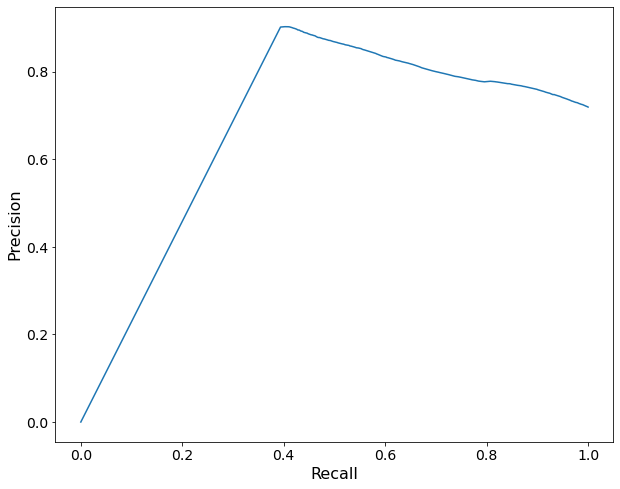

In [29]:
plt.figure(figsize=(10,8))

plt.plot(rec_scores, prec_scores)

plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()